<a href="https://colab.research.google.com/github/a-afonso/03MAIR-Algoritmos-de-optimizacion/blob/master/Utilidades/Seminario_Problema_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1.0, 34.900050287048785]
[2.0, 36.59360791885686]
[5.0, 35.70600912710881]
[6.0, 34.8619967783613]
[9.0, 33.340237158879496]
[11.0, 35.01693434644403]
[14.0, 36.38835036436315]
[15.0, 38.082856154096845]
[17.0, 40.07867057561781]
[19.0, 35.97902436129595]
[21.0, 37.53614035578198]
[22.0, 37.06725702984987]
[23.0, 35.44058906192566]
[24.0, 37.41072537460082]
[26.0, 38.15111981674126]
[28.0, 36.1157552531898]
[29.0, 36.334075287970364]
4
3


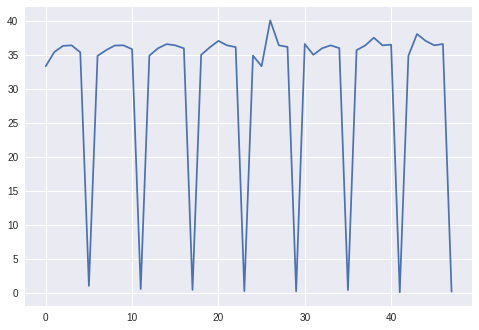

[[33.340237158879496,
  35.44058906192566,
  36.334075287970364,
  36.411964661890174,
  35.381716542666425,
  1.0302481192237494],
 [34.8619967783613,
  35.70600912710881,
  36.38835036436315,
  36.411964661890174,
  35.842080232930854,
  0.5698844289593197],
 [34.900050287048785,
  35.97902436129595,
  36.59360791885686,
  36.411964661890174,
  35.97116180727294,
  0.4408028546172318],
 [35.01693434644403,
  36.1157552531898,
  37.06725702984987,
  36.411964661890174,
  36.15297782284347,
  0.25898683904670605],
 [34.900050287048785,
  33.340237158879496,
  40.07867057561781,
  36.411964661890174,
  36.182730670859065,
  0.22923399103110853],
 [36.59360791885686,
  35.01693434644403,
  35.97902436129595,
  36.411964661890174,
  36.00038282212176,
  0.41158183976841656],
 [35.70600912710881,
  36.38835036436315,
  37.53614035578198,
  36.411964661890174,
  36.51061612728603,
  0.09865146539585368],
 [34.8619967783613,
  38.082856154096845,
  37.06725702984987,
  36.411964661890174,
  

In [60]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

# Inicialización de variables globales
nAnimals = 30
nTreats = 2
nGroups = 2

# Creación de un dataset de muestra
MUESTRA = pd.DataFrame()
MUESTRA["Id"] = [i for i in range(nAnimals)]
MUESTRA["Peso"] = [random.gauss(37, 2.1) for i in range(nAnimals)]
MUESTRA["Sexo"] = [random.getrandbits(1) for i in range(nAnimals)]

# Dividimos el dataset en dos listas, una para cada sexo
MALE = []
FEMALE = []

for index, row in MUESTRA.iterrows():
  if row["Sexo"] == 0:
    MALE.append([row["Id"], row["Peso"]])
  else:
    FEMALE.append([row["Id"], row["Peso"]])

# Calcula el número máximo de animales por grupo
nMale = len(MALE)
nFemale = len(FEMALE)

nAnimalsGroup = min(nMale, nFemale) // (nTreats * nGroups)

# Función para agrupar una lista de cualquier sexo
def group_animals(L, nTreats, nGroups, nAnimalsGroup):
  RES = []
  
  # Calcula el peso medio
  p_medio = np.mean(L, axis=0)[1]
  
  # Calcula el número total de grupos
  nTotalGroups = nTreats * nGroups
  
  # Calcula el número de animales de la lista
  nAnimalsSex = nTotalGroups * nAnimalsGroup
  
  # Ordenamos la muestra por peso
  LUNSORTED = L
  LSORTED = sorted(L, key=lambda x : x[1])
  for x in L: print(x)
  
  print(nTotalGroups)
  print(nAnimalsGroup)
    
  for i in range(nTotalGroups):
    G = []
    for j in range(i, nAnimalsSex, nTotalGroups):
      G.append(LSORTED[j][1])
    G.append(p_medio)
    m = np.mean(G)
    G.append(m)
    G.append(abs(p_medio - m))
      
    RES.append(G)
    
  for i in range(nTotalGroups):
    G = []
    for j in range(i, nAnimalsSex, nTotalGroups):
      G.append(LUNSORTED[j][1])
    G.append(p_medio)
    m = np.mean(G)
    G.append(m)
    G.append(abs(p_medio - m))
      
    RES.append(G)
  
  X = []
  for x1 in RES: 
    for x2 in x1: 
      X.append(x2)
    
  plt.plot(X, label='linear')
  plt.show()
  
  return RES
  
group_animals(MALE, nTreats, nGroups, nAnimalsGroup)  
  

# Creamos una lista que contendrá los individuos de cada grupo




#


